In [1]:
import pyspark

In [2]:
from pyspark.sql import SparkSession

In [3]:
from pyspark.sql.functions import col

In [4]:
from pyspark.sql.functions import desc

In [5]:
from pyspark.sql.functions import asc

In [6]:
import findspark

In [7]:
findspark.init()

In [8]:
spark = SparkSession.builder.appName('200M').getOrCreate()

## Loading the Data

In [9]:
Mens200m = spark.read.format('csv').option('inferSchema','true').option('header','true').option('path','Men200m.csv').load()

In [10]:
Womens200m = spark.read.format('csv').option('inferSchema','true').option('header','true').option('path','Womens200m.csv').load()

In [11]:
IndoorMens200m = spark.read.format('csv').option('inferSchema','true').option('header','true').option('path','Indoor200mMen.csv').load()

In [12]:
IndoorWomens200m = spark.read.format('csv').option('inferSchema','true').option('header','true').option('path','IndoorWomens200m.csv').load()

In [13]:
from pyspark.sql.types import StructType, StructField, StringType, IntegerType

In [14]:
Mens200m.createOrReplaceTempView("Mens200m")

In [15]:
Womens200m.createOrReplaceTempView("Womens200m")

In [16]:
IndoorMens200m.createOrReplaceTempView("IndoorMens200m")

In [17]:
IndoorWomens200m.createOrReplaceTempView("IndoorWomens200m")

In [18]:
resultone = spark.sql("SELECT * FROM Mens200m")
resultone.show()

+--------------------+-----+-----------------+
|               Names|Times|          Schools|
+--------------------+-----+-----------------+
|    (1) Walter DIXJR|19.69|    Florida State|
|(2) Divine ODUDURUJR|19.73|       Texas Tech|
|(3) Udodi ONWUZUR...|19.76|         Stanford|
|     — Oduduru {2}JR|19.76|       Texas Tech|
|(4) Terrance LAIRDJR|19.81|              LSU|
|       — Laird {2}JR|19.82|              LSU|
|(5) Joseph FAHNBU...|19.83|          Florida|
|  — Onwuzurike {2}SO|19.84|         Stanford|
|(6) Christian COL...|19.85|        Tennessee|
|(7) Courtney LIND...|19.86|       Texas Tech|
| (7) Justin GATLINSO|19.86|        Tennessee|
|(9) Terrence JONESJR|19.87|       Texas Tech|
|    (9) John CAPELFR|19.87|          Florida|
|(9) Lorenzo DANIELSR|19.87|Mississippi State|
|     — Lindsey {2}SR|19.88|       Texas Tech|
|(12) Robert GREGO...|19.89|          Florida|
|  — Onwuzurike {3}SO|19.91|         Stanford|
|  — Fahnbulleh {2}FR|19.91|          Florida|
|(13) Wallace

In [19]:
resulttwo = spark.sql("SELECT * FROM Womens200m")
resulttwo.show()

+--------------------+-----+-------------------+
|               Names|Times|            Schools|
+--------------------+-----+-------------------+
|  (1) Abby STEINERJR| 21.8|           Kentucky|
| (2) Julien ALFREDJR|21.91|              Texas|
|  (3) Favour OFILISO|21.96|                LSU|
|     — Steiner {2}JR|22.02|           Kentucky|
|(4) Kyra JEFFERSONSR|22.02|            Florida|
|       — Ofili {2}SO|22.04|                LSU|
|   (5) Dawn SOWELLSR|22.04|                LSU|
|       — Ofili {3}SO|22.05|                LSU|
|     — Steiner {3}JR|22.05|           Kentucky|
|     — Steiner {4}JR|22.07|           Kentucky|
|       — Ofili {4}SO|22.08|                LSU|
| (6) Latasha SMITHJR|22.09|                UCF|
|      — Alfred {2}JR|22.09|              Texas|
|(6) Deajah STEVENSJR|22.09|             Oregon|
|(8) Cambrea STURG...|22.12| North Carolina A&T|
|       — Ofili {5}SO|22.13|                LSU|
|  (9) Tamara CLARKJR|22.13|            Alabama|
|       — Clark {2}J

In [20]:
resultthree = spark.sql("SELECT * FROM IndoorWomens200m")
resultthree.show()

+--------------------+-----+---------------+
|               Names|Times|        Schools|
+--------------------+-----+---------------+
| (1) Julien ALFREDSR|22.01|          Texas|
|  (2) Abby STEINERJR|22.09|       Kentucky|
|  (3) Favour OFILIJR|22.11|            LSU|
|     — Steiner {2}JR|22.16|       Kentucky|
|       — Ofili {2}JR| 22.2|            LSU|
|      — Alfred {2}SR|22.26|          Texas|
|       — Ofili {3}JR|22.36|            LSU|
|     — Steiner {3}JR|22.37|       Kentucky|
|      — Alfred {3}SR|22.38|          Texas|
|     — Steiner {4}JR|22.38|       Kentucky|
|  (4) Gabby THOMASJR|22.38|        Harvard|
| (5) Bianca KNIGHTFR| 22.4|          Texas|
|     — Steiner {5}JR|22.41|       Kentucky|
|(6) Ashley HENDER...|22.41|San Diego State|
| (7) Autumn WILSONFR|22.42|        Georgia|
|(7) Ariana WASHIN...|22.42|         Oregon|
|(9) Veronica CAMP...|22.43|       Arkansas|
|     — Steiner {6}JR|22.44|       Kentucky|
|      — Wilson {2}FR|22.45|        Georgia|
|     — St

In [21]:
resultfour = spark.sql("SELECT * FROM IndoorMens200m")
resultfour.show()

+--------------------+-----+-------------------+
|               Names|Times|            Schools|
+--------------------+-----+-------------------+
|   (1) Elijah HALLSR|20.02|            Houston|
|(2) Divine ODUDURUJR|20.08|         Texas Tech|
|(3) Wallace SPEAR...| 20.1|           Arkansas|
|(4) Christian COL...|20.11|          Tennessee|
|(5) Matthew BOLINGSR|20.12|            Georgia|
|(6) Courtney LIND...|20.13|         Texas Tech|
|(7) Udodi ONWUZUR...|20.17|           Stanford|
| (7) Tarsis OROGOTSO|20.17|            Alabama|
|     — Oduduru {2}FR|20.18|         Texas Tech|
|      — Boling {2}SO|20.19|            Georgia|
| (9) Trayvon BROMELL|20.19|             Baylor|
|      — Orogot {2}SO| 20.2|            Alabama|
|      — Orogot {3}SO| 20.2|            Alabama|
|(10) Terrance LAI...| 20.2|                LSU|
|  — Oduduru {3}RS FR|20.21|         Texas Tech|
|    — Spearmon {2}SO|20.21|           Arkansas|
|(11) Robert GREGO...|20.22|            Florida|
|       — Bromell {2

In [23]:
QueryOneA = spark.sql("SELECT Times, COUNT(*) as count FROM Mens200m GROUP BY Times ORDER BY count DESC")
QueryOneA.show()
#disregard the 19.58 as it was wind aided

+-----+-----+
|Times|count|
+-----+-----+
|19.97|    5|
|19.98|    4|
|19.95|    3|
|19.91|    3|
|19.87|    3|
|19.94|    3|
| 20.0|    3|
|19.99|    2|
|19.76|    2|
|19.92|    2|
|19.93|    2|
|19.86|    2|
|19.89|    1|
|19.69|    1|
|19.81|    1|
|19.82|    1|
|19.73|    1|
|19.85|    1|
|19.88|    1|
|19.84|    1|
+-----+-----+
only showing top 20 rows



In [24]:
QueryOneB = spark.sql("SELECT Times, COUNT(*) as count FROM IndoorMens200m GROUP BY Times ORDER BY count DESC")
QueryOneB.show()

+-----+-----+
|Times|count|
+-----+-----+
|20.33|    5|
|20.32|    5|
|20.27|    4|
|20.26|    4|
|20.34|    4|
| 20.2|    3|
|20.21|    2|
|20.17|    2|
|20.19|    2|
|20.29|    2|
|20.31|    2|
|20.12|    1|
| 20.1|    1|
|20.08|    1|
|20.22|    1|
| 20.3|    1|
|20.13|    1|
|20.11|    1|
|20.18|    1|
|20.02|    1|
+-----+-----+
only showing top 20 rows



In [25]:
QueryTwoA = spark.sql("SELECT Times, COUNT(*) as count FROM Womens200m GROUP BY Times ORDER BY count DESC")
QueryTwoA.show()

+-----+-----+
|Times|count|
+-----+-----+
|22.26|    7|
|22.21|    4|
|22.29|    4|
|22.25|    3|
|22.23|    3|
|22.13|    3|
|22.24|    3|
|22.09|    3|
|22.28|    3|
|22.05|    2|
|22.17|    2|
|22.19|    2|
|22.04|    2|
|22.02|    2|
|22.16|    1|
|21.91|    1|
| 21.8|    1|
|22.22|    1|
|22.18|    1|
|21.96|    1|
+-----+-----+
only showing top 20 rows



In [26]:
QueryTwoB = spark.sql("SELECT Times, COUNT(*) as count FROM IndoorWomens200m GROUP BY Times ORDER BY count DESC")
QueryTwoB.show()

+-----+-----+
|Times|count|
+-----+-----+
|22.52|    5|
|22.58|    4|
|22.45|    4|
|22.38|    3|
| 22.5|    3|
|22.49|    3|
|22.55|    3|
|22.54|    3|
|22.57|    3|
|22.53|    2|
|22.51|    2|
|22.46|    2|
|22.48|    2|
|22.42|    2|
|22.41|    2|
|22.26|    1|
|22.16|    1|
| 22.4|    1|
|22.36|    1|
|22.01|    1|
+-----+-----+
only showing top 20 rows



In [27]:
QueryThreeA = spark.sql("SELECT Schools, COUNT(*) as count FROM Womens200m GROUP BY Schools ORDER BY count DESC")
QueryThreeA.show()

+-------------------+-----+
|            Schools|count|
+-------------------+-----+
|                LSU|   13|
|              Texas|    6|
|           Kentucky|    6|
|             Oregon|    4|
|            Florida|    4|
| North Carolina A&T|    3|
|         Ohio State|    3|
|          Texas A&M|    3|
|            Alabama|    3|
|Southern California|    2|
|           Nebraska|    1|
|            Georgia|    1|
|         Ball State|    1|
|          Tennessee|    1|
|                UCF|    1|
+-------------------+-----+



In [28]:
QueryFourA = spark.sql("SELECT Schools, COUNT(*) as count FROM Mens200m GROUP BY Schools ORDER BY count DESC")
QueryFourA.show()

+-----------------+-----+
|          Schools|count|
+-----------------+-----+
|          Florida|    8|
|       Texas Tech|    7|
|              LSU|    5|
|        Tennessee|    5|
|         Stanford|    3|
|          Alabama|    3|
|         Arkansas|    2|
|Mississippi State|    2|
|          Houston|    2|
|           Oregon|    1|
|             UCLA|    1|
|          Georgia|    1|
|        Texas A&M|    1|
|    Florida State|    1|
|   South Carolina|    1|
+-----------------+-----+



In [29]:
QueryThreeB = spark.sql("SELECT Schools, COUNT(*) as count FROM IndoorWomens200m GROUP BY Schools ORDER BY count DESC")
QueryThreeB.show()

+-------------------+-----+
|            Schools|count|
+-------------------+-----+
|                LSU|   12|
|           Kentucky|   11|
|              Texas|    9|
|             Oregon|    5|
|            Georgia|    3|
|             Auburn|    2|
|           Arkansas|    2|
|         Ohio State|    2|
|           Ole Miss|    2|
|          Texas A&M|    2|
|          Tennessee|    2|
|            Alabama|    1|
|Southern California|    1|
|            Harvard|    1|
|     South Carolina|    1|
|    San Diego State|    1|
+-------------------+-----+



In [30]:
QueryFourB = spark.sql("SELECT Schools, COUNT(*) as count FROM IndoorMens200m GROUP BY Schools ORDER BY count DESC")
QueryFourB.show()

+-------------------+-----+
|            Schools|count|
+-------------------+-----+
|         Texas Tech|    7|
|            Alabama|    6|
|            Florida|    6|
|         Louisville|    4|
|            Georgia|    4|
|                LSU|    3|
|           Arkansas|    2|
|             Baylor|    2|
|      Florida State|    2|
|            Houston|    2|
|Southern California|    2|
|            Clemson|    2|
| North Carolina A&T|    1|
|           Stanford|    1|
|           Kentucky|    1|
|          Tennessee|    1|
+-------------------+-----+



In [31]:
QueryFiveA = spark.sql("SELECT Times, COUNT(*) as count, (COUNT(*) / (SELECT COUNT(*) FROM Womens200m)) * 100 as percentage FROM Womens200m GROUP BY Times")
QueryFiveA.show()

+-----+-----+------------------+
|Times|count|        percentage|
+-----+-----+------------------+
|22.05|    2|3.8461538461538463|
|22.26|    7|13.461538461538462|
|22.16|    1|1.9230769230769231|
|22.17|    2|3.8461538461538463|
|22.21|    4|7.6923076923076925|
|22.29|    4|7.6923076923076925|
|22.25|    3| 5.769230769230769|
|21.91|    1|1.9230769230769231|
| 21.8|    1|1.9230769230769231|
|22.19|    2|3.8461538461538463|
|22.23|    3| 5.769230769230769|
|22.13|    3| 5.769230769230769|
|22.22|    1|1.9230769230769231|
|22.18|    1|1.9230769230769231|
|22.24|    3| 5.769230769230769|
|22.09|    3| 5.769230769230769|
|21.96|    1|1.9230769230769231|
|22.04|    2|3.8461538461538463|
|22.28|    3| 5.769230769230769|
|22.07|    1|1.9230769230769231|
+-----+-----+------------------+
only showing top 20 rows



In [32]:
QueryFiveB = spark.sql("SELECT Times, COUNT(*) as count, (COUNT(*) / (SELECT COUNT(*) FROM Mens200m)) * 100 as percentage FROM Mens200m GROUP BY Times")
QueryFiveB.show()

+-----+-----+------------------+
|Times|count|        percentage|
+-----+-----+------------------+
|19.98|    4|  9.30232558139535|
|19.95|    3| 6.976744186046512|
|19.89|    1|2.3255813953488373|
|19.69|    1|2.3255813953488373|
|19.81|    1|2.3255813953488373|
|19.91|    3| 6.976744186046512|
|19.82|    1|2.3255813953488373|
|19.99|    2| 4.651162790697675|
|19.76|    2| 4.651162790697675|
|19.73|    1|2.3255813953488373|
|19.87|    3| 6.976744186046512|
|19.85|    1|2.3255813953488373|
|19.94|    3| 6.976744186046512|
|19.92|    2| 4.651162790697675|
|19.88|    1|2.3255813953488373|
|19.93|    2| 4.651162790697675|
| 20.0|    3| 6.976744186046512|
|19.84|    1|2.3255813953488373|
|19.86|    2| 4.651162790697675|
|19.97|    5|11.627906976744185|
+-----+-----+------------------+
only showing top 20 rows



In [34]:
QuerySixA = spark.sql("SELECT Times, COUNT(*) as count, (COUNT(*) / (SELECT COUNT(*) FROM IndoorWomens200m)) * 100 as percentage FROM IndoorWomens200m GROUP BY Times")
QuerySixA.show()

+-----+-----+------------------+
|Times|count|        percentage|
+-----+-----+------------------+
|22.26|    1|1.7543859649122806|
|22.53|    2| 3.508771929824561|
|22.51|    2| 3.508771929824561|
|22.16|    1|1.7543859649122806|
| 22.4|    1|1.7543859649122806|
|22.36|    1|1.7543859649122806|
|22.01|    1|1.7543859649122806|
|22.56|    1|1.7543859649122806|
|22.11|    1|1.7543859649122806|
|22.58|    4| 7.017543859649122|
|22.38|    3| 5.263157894736842|
| 22.5|    3| 5.263157894736842|
|22.46|    2| 3.508771929824561|
| 22.2|    1|1.7543859649122806|
|22.39|    1|1.7543859649122806|
|22.48|    2| 3.508771929824561|
|22.49|    3| 5.263157894736842|
|22.45|    4| 7.017543859649122|
|22.55|    3| 5.263157894736842|
|22.09|    1|1.7543859649122806|
+-----+-----+------------------+
only showing top 20 rows



In [35]:
QuerySixB = spark.sql("SELECT Times, COUNT(*) as count, (COUNT(*) / (SELECT COUNT(*) FROM IndoorMens200m)) * 100 as percentage FROM IndoorMens200m GROUP BY Times")
QuerySixB.show()

+-----+-----+------------------+
|Times|count|        percentage|
+-----+-----+------------------+
|20.21|    2|4.3478260869565215|
|20.17|    2|4.3478260869565215|
|20.27|    4| 8.695652173913043|
|20.26|    4| 8.695652173913043|
|20.12|    1|2.1739130434782608|
| 20.2|    3| 6.521739130434782|
|20.19|    2|4.3478260869565215|
| 20.1|    1|2.1739130434782608|
|20.08|    1|2.1739130434782608|
|20.22|    1|2.1739130434782608|
|20.29|    2|4.3478260869565215|
| 20.3|    1|2.1739130434782608|
|20.13|    1|2.1739130434782608|
|20.11|    1|2.1739130434782608|
|20.18|    1|2.1739130434782608|
|20.33|    5|10.869565217391305|
|20.32|    5|10.869565217391305|
|20.31|    2|4.3478260869565215|
|20.02|    1|2.1739130434782608|
|20.28|    1|2.1739130434782608|
+-----+-----+------------------+
only showing top 20 rows



In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\MoJo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [37]:
Mens200mDF = pd.read_csv('Men200m.csv')
Mens200mDF

,Names,Times,Schools
0,(1) Walter DIXJR,19.69,Florida State
1,(2) Divine ODUDURUJR,19.73,Texas Tech
2,(3) Udodi ONWUZURIKESO,19.76,Stanford
3,— Oduduru {2}JR,19.76,Texas Tech
4,(4) Terrance LAIRDJR,19.81,LSU
5,— Laird {2}JR,19.82,LSU
6,(5) Joseph FAHNBULLEHSO,19.83,Florida
7,— Onwuzurike {2}SO,19.84,Stanford
8,(6) Christian COLEMANJR,19.85,Tennessee
9,(7) Courtney LINDSEYSR,19.86,Texas Tech


In [38]:
Womens200mDF = pd.read_csv('Womens200m.csv')
Womens200mDF

,Names,Times,Schools
0,(1) Abby STEINERJR,21.80,Kentucky
1,(2) Julien ALFREDJR,21.91,Texas
2,(3) Favour OFILISO,21.96,LSU
3,— Steiner {2}JR,22.02,Kentucky
4,(4) Kyra JEFFERSONSR,22.02,Florida
5,— Ofili {2}SO,22.04,LSU
6,(5) Dawn SOWELLSR,22.04,LSU
7,— Ofili {3}SO,22.05,LSU
8,— Steiner {3}JR,22.05,Kentucky
9,— Steiner {4}JR,22.07,Kentucky


In [39]:
IndoorMens200mDF = pd.read_csv('Indoor200mMen.csv')
IndoorMens200mDF

,Names,Times,Schools
0,(1) Elijah HALLSR,20.02,Houston
1,(2) Divine ODUDURUJR,20.08,Texas Tech
2,(3) Wallace SPEARMONSO,20.10,Arkansas
3,(4) Christian COLEMANJR,20.11,Tennessee
4,(5) Matthew BOLINGSR,20.12,Georgia
5,(6) Courtney LINDSEYSR,20.13,Texas Tech
6,(7) Udodi ONWUZURIKESO,20.17,Stanford
7,(7) Tarsis OROGOTSO,20.17,Alabama
8,— Oduduru {2}FR,20.18,Texas Tech
9,— Boling {2}SO,20.19,Georgia


In [40]:
IndoorWomens200mDF = pd.read_csv('IndoorWomens200m.csv')
IndoorWomens200mDF

,Names,Times,Schools
0,(1) Julien ALFREDSR,22.01,Texas
1,(2) Abby STEINERJR,22.09,Kentucky
2,(3) Favour OFILIJR,22.11,LSU
3,— Steiner {2}JR,22.16,Kentucky
4,— Ofili {2}JR,22.20,LSU
5,— Alfred {2}SR,22.26,Texas
6,— Ofili {3}JR,22.36,LSU
7,— Steiner {3}JR,22.37,Kentucky
8,— Alfred {3}SR,22.38,Texas
9,— Steiner {4}JR,22.38,Kentucky


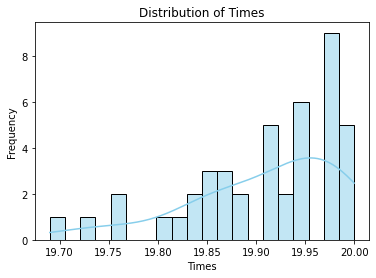

In [41]:
# Create a histogram using Seaborn
column_name = "Times"
sns.histplot(Mens200mDF[column_name], bins=20, kde=True, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Distribution of {column_name} for Mens 200m')

# Show the plot
plt.show()


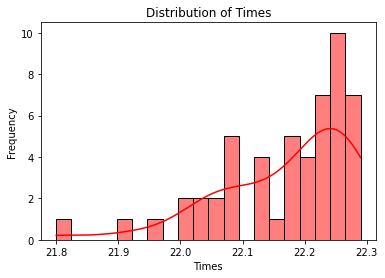

In [42]:
# Create a histogram using Seaborn
column_name = "Times"
sns.histplot(Womens200mDF[column_name], bins=20, kde=True, color='red', edgecolor='black')

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Distribution of {column_name} for Womens 200m')

# Show the plot
plt.show()


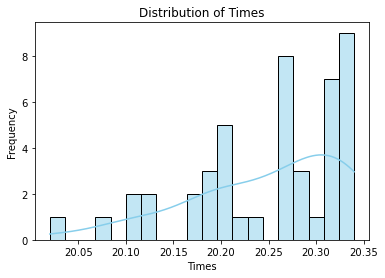

In [43]:
# Create a histogram using Seaborn
column_name = "Times"
sns.histplot(IndoorMens200mDF[column_name], bins=20, kde=True, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Distribution of {column_name} for IndoorMens 200m')

# Show the plot
plt.show()


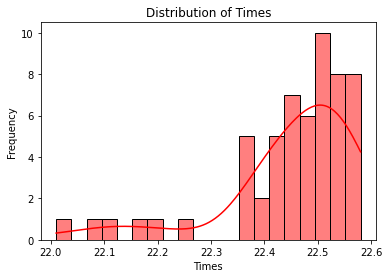

In [44]:
# Create a histogram using Seaborn
column_name = "Times"
sns.histplot(IndoorWomens200mDF[column_name], bins=20, kde=True, color='red', edgecolor='black')

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Distribution of {column_name} Indoor Womens 200m')

# Show the plot
plt.show()


## Distribution of Schools

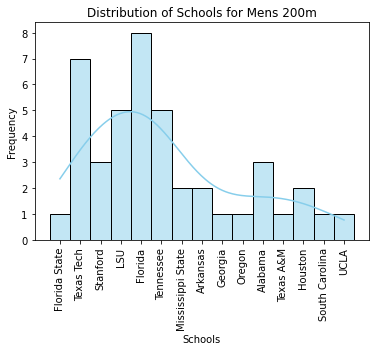

In [46]:
# Create a histogram using Seaborn
column_name = "Schools"
sns.histplot(Mens200mDF[column_name], bins=20, kde=True, color='skyblue', edgecolor='black')

plt.xticks(rotation=90)

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Distribution of {column_name} for Mens 200m')

# Show the plot
plt.show()

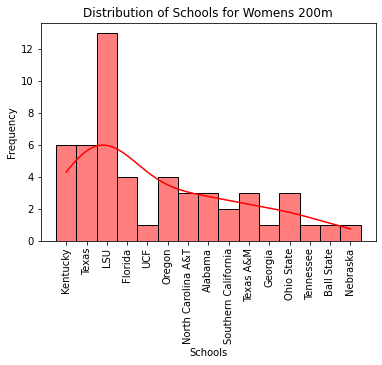

In [48]:
# Create a histogram using Seaborn
column_name = "Schools"
sns.histplot(Womens200mDF[column_name], bins=20, kde=True, color='red', edgecolor='black')

plt.xticks(rotation=90)

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Distribution of {column_name} for Womens 200m')

# Show the plot
plt.show()


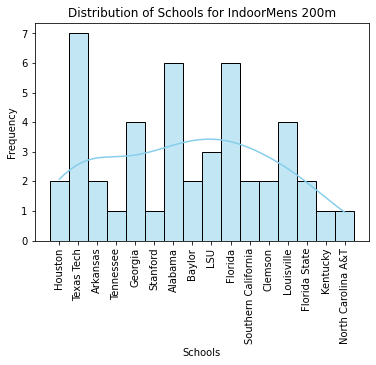

In [50]:
# Create a histogram using Seaborn
column_name = "Schools"
sns.histplot(IndoorMens200mDF[column_name], bins=20, kde=True, color='skyblue', edgecolor='black')

plt.xticks(rotation=90)

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Distribution of {column_name} for IndoorMens 200m')

# Show the plot
plt.show()

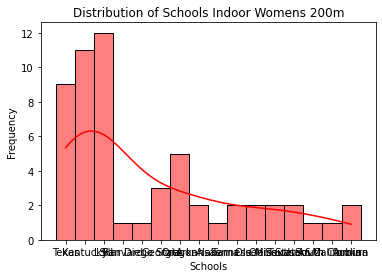

In [51]:
# Create a histogram using Seaborn
column_name = "Schools"
sns.histplot(IndoorWomens200mDF[column_name], bins=20, kde=True, color='red', edgecolor='black')

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Distribution of {column_name} Indoor Womens 200m')

# Show the plot
plt.show()